# Ingesting video

In [1]:
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import pdb
import regex as re
import sys

from collections import namedtuple 
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm
from skimage.io import imread_collection
#from sklearn.model_selection import train_test_split
import yaml

In [3]:
from utils.display.videofig import videofig, redraw_fn

In [4]:
%matplotlib notebook

In [5]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
clippath = '/Users/lambert/images/virat2-aerial/09152008flight2tape3_9.mpg'

# Demonstrate using PyAV

In [11]:
import av

In [12]:
v = av.open(clippath)
v

<av.InputContainer '/Users/lambert/images/virat2-aerial/09152008flight2tape3_9.mpg'>

In [14]:
v.size

197182860

In [13]:
v.duration

310009700

In [20]:
type(v.streams[0])

av.video.stream.VideoStream

In [21]:
v.streams[0].frames

0

In [ ]:
p = v.demux()
p

In [ ]:
v.seek(0, 'frame')

In [ ]:
cnt = 0
for pkt in v.demux():
    cnt += 1
cnt

In [ ]:
pkt = v.demux()
pkt.decode()

In [ ]:
cnt = 0
for frm in v.decode(video=0):
    foo = frm.to_image()
    cnt += 1
cnt

In [ ]:
plt.imshow(foo)

# Demonstrate using PIMS (which has the advantage of allowing random access in a file)

In [7]:
import pims
# I think I had to make some changes to the PIMS source to make this work.

In [8]:
seq = pims.PyAVReaderIndexed(clippath)

In [9]:
len(seq)

9291

In [ ]:
def my_draw(f, seq):
    img = seq[f]
    fullpath = seq._files[f]
    title = "{} - {} w x {} h".format(os.path.basename(fullpath), img.shape[1], img.shape[0])
    return (img, None, title)

In [ ]:
pims.__version__

In [ ]:
pims.__path__

In [ ]:
def overlay_annots(ax, f, seq):
    pass

<IPython.core.display.Javascript object>


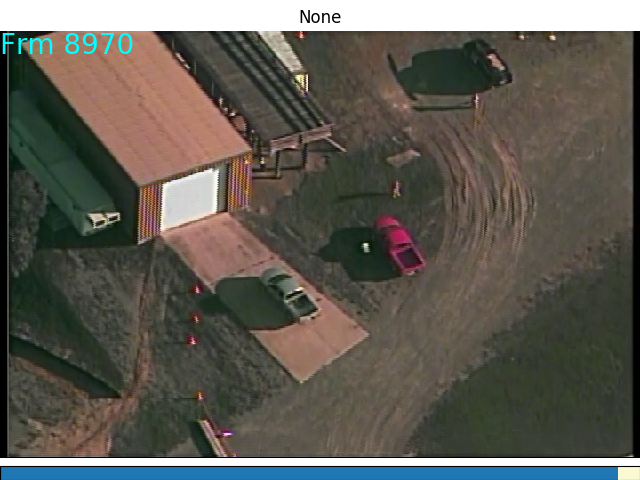

In [10]:
f = videofig(len(seq), redraw_fn, proc_func=lambda f: (seq[f]),
         overlay_func = None, autostart=False)